In [1]:
import pandas as pd
data_dir = 'data_local'
lb = '21dpi_iwgsc_bowtie_m_all_2'

In [2]:
srna_file = data_dir + '/ss/' + lb + '/ShortStack_D.gff3'
df = pd.read_csv(srna_file,sep="\t",header=None, comment='#')
df.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print('sRNA len:',len(df.index))

('sRNA len:', 36775)


In [3]:
results_file = data_dir + '/ss/' + lb + '/Results.txt'
df_res = pd.read_csv(results_file,sep="\t")
df_res = df_res[df_res.DicerCall.isin(['21','22','24'])]
print('Res len:',len(df_res.index))

('Res len:', 36682)


In [4]:
#cat Counts.txt | grep -v NA > counts.clean.txt
counts_file = data_dir + '/ss/' + lb + '/counts.clean.txt'
df_counts = pd.read_csv(counts_file,sep="\t")
print('Counts len:',len(df_counts.index))

('Counts len:', 48828)


In [5]:
df_counts = df_counts[df_counts.Name.isin(df_res.Name.tolist())]
print('Counts filtered len:',len(df_counts.index))

('Counts filtered len:', 36682)


In [6]:
df_counts.to_csv(data_dir + '/res/' + lb + '/counts_filtered.csv', sep='\t')

In [7]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

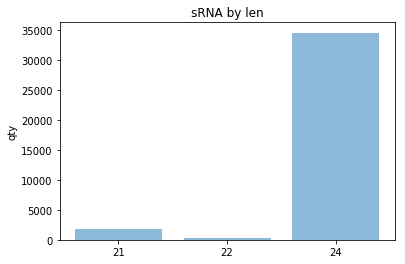

In [33]:
objects = ('21', '22', '24')
y_pos = np.arange(len(objects))
y21 = len(df_res[df_res.DicerCall == '21'].index)
y22 = len(df_res[df_res.DicerCall == '22'].index)
y24 = len(df_res[df_res.DicerCall == '24'].index)
performance = [y21, y22, y24]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('qty')
plt.title('sRNA by len')
plt.show()

In [5]:
y21 = len(df_res[df_res.DicerCall == '21'].index)
y22 = len(df_res[df_res.DicerCall == '22'].index)
y24 = len(df_res[df_res.DicerCall == '24'].index)
y21, y22, y24

(1815, 270, 34597)